<h1 style="font-family:Impact,Arial;font-size:30px;">37004 Interest Rates and Credit Risk Models - Spring 2022</h1>
<h1 style="font-family:Impact,Arial;font-size:45px;">Assignment Part 3</h1>
<h2 style="font-family:Arial;">Erik Schl&ouml;gl</h2>
<p><small> School of Mathematical &amp; Physical Sciences<br>
University of Technology Sydney
</small></p>
<p>
<a href="mailto:Erik.Schlogl@uts.edu.au?Subject=37000 JIT" target="_blank">
<small><font color=MediumVioletRed>Erik.Schlogl@uts.edu.au</font></small></a>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

In all the tasks below, suppose that current default–free interest rates are 1.5% continuously compounded, for all maturities. Suppose further that a corporate entity has issued &euro;150 million of corporate debt (only), paying no coupons and maturing in 10 years. This entity has a market capitalisation of &euro;28 million and the volatility of its share price is approximately 40%.

<H2>Task 1:</H2>
Using the Black-Scholes/Merton model of credit risk as explained in Lecture 7, determine the value of the debt. What is the credit spread (in terms of continuously compounded yields) for this entity? <I>(5 marks)</I>

In [15]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from scipy.stats import norm

In [16]:
rf = 0.015
E = 28
K = 150
T = 10
sgm_e = 0.4

#Set up 2 equations and 2 unknowns to solve for V and sgm_v

def f_1(V,sgm_v,debt,r,ttm,equity):
    d1 = (np.log(V/debt)+(r+0.5*sgm_v**2)*(ttm))/(sgm_v*np.sqrt(ttm))
    d2 = d1 - sgm_v*np.sqrt(ttm)

    return (equity + debt*np.exp(-r*ttm)*norm.cdf(d2))/(norm.cdf(d1)) - V

def f_2(V,sgm_v,debt,r,ttm,equity,equity_vol):
    d1 = (np.log(V/debt)+(r+0.5*sgm_v**2)*(ttm))/(sgm_v*np.sqrt(ttm))

    return equity_vol/(norm.cdf(d1)*(V/equity)) - sgm_v

def hg(xy):
    V = xy[0]
    sgm_v = xy[1]

    h = f_1(V,sgm_v,K,rf,T,E)
    g = f_2(V,sgm_v,K,rf,T,E,sgm_e)

    return np.array([h,g])

guess = np.array([100,0.1])

firm_value = fsolve(hg,guess)[0]
firm_vol = fsolve(hg,guess)[1]

value_of_debt = firm_value - E

print(f"Market Value of Firm: {firm_value}")
print(f"Volatility of Firm Value: {firm_vol}")
print(f"Market Value of Debt = {value_of_debt}")

Market Value of Firm: 144.65552922871257
Volatility of Firm Value: 0.11208381315282157
Market Value of Debt = 116.65552922871257


In [17]:
risky_yield = -np.log(value_of_debt/K)/T
risky_yield

0.025140989659175255

In [18]:
credit_spread = risky_yield - rf
print(f"Credit Spread = {credit_spread}")

Credit Spread = 0.010140989659175256


<H2>Task 2:</H2>
Assume now that the default-free bond price dynamics and firm's value process are given by
\begin{eqnarray*}
\frac{dB(t,T)}{B(t,T)}&=&rdt+\sigma_r\cdot(T-t)dW_1(t)\\
\frac{dV(t)}{V(t)}&=&rdt+\sigma_V\left(\rho
dW_1(t)+\sqrt{1-\rho^2}dW_2(t)\right)
\end{eqnarray*}
with $W_1$ and $W_2$ independent Brownian motions under the spot risk-neutral measure. Assume further that the firm defaults at time $\tau$ if 
$$
V(\tau)<B(\tau,T)K
$$
where $T$ is the maturity of the debt and $K$ is the face value of the debt. In the event of default at time $\tau$, the debt holders receive a total of $KcB(\tau,T)$ at time $\tau$.

In addition to the information given above, assume $\rho=-0.4$ and $\sigma_r=0.015$. Determine the value of the debt as a function of $c$. Plot the credit spread (in terms of continuously compounded yields) for this entity as a function of $c$ for $0<c<1$. <I>(5 marks)</I>

Under a model with stochastic interest rates, the price of equity can be calculated as:

$$ E = V \times \left(N\left(\frac{k - 0.5 \times Q(T)}{\sqrt{Q(T)}}\right) - e^{-2k}\times N\left(\frac{-k - 0.5\times Q(T)}{\sqrt{Q(T)}}\right)\right) - KB\times \left(N\left(\frac{k + 0.5 \times Q(T)}{\sqrt{Q(T)}}\right) - e^{-2k}\times N\left(\frac{-k + 0.5\times Q(T)}{\sqrt{Q(T)}}\right)\right)$$

From Mathematica, the partial derivative of equity with respect to the firms value is then:

$$ \frac{B^2 K^2 \sqrt{Q(T)} V \text{CDF}\left[\frac{-k-0.5 Q(T)}{\sqrt{Q(T)}}\right]-2 B^3 K^3 \sqrt{Q(T)} \text{CDF}\left[\frac{0.5 Q(T)-k}{\sqrt{Q(T)}}\right]+\sqrt{Q(T)} V^3 \text{CDF}\left[\frac{k-0.5 Q(T)}{\sqrt{Q(T)}}\right]+B^2 K^2 V \text{CDF}'\left(\frac{-k-0.5 Q(T)}{\sqrt{Q(T)}}\right)-B^3 K^3 \text{CDF}'\left(\frac{0.5 Q(T)-k}{\sqrt{Q(T)}}\right)+V^3 \text{CDF}'\left(\frac{k-0.5 Q(T)}{\sqrt{Q(T)}}\right)-B K V^2 \text{CDF}'\left(\frac{k+0.5 Q(T)}{\sqrt{Q(T)}}\right)}{\sqrt{Q(T)} V^3} $$

The relation between the volatility of equity and volatility of the firms value is:

$$ \sigma_E = \frac{\partial E}{\partial V} \times \frac{V}{E} \times \sigma_V $$

Using these functions we can solve for V and Sigma_V:


In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
r = 0.015
T = 10
sgm_e = 0.4
E = 28000000
K = 150000000
B = np.exp(-r * T)
rho = -0.4
sgm_r = 0.015

In [21]:
def Q(sgm_v, rho, T, sgm_r):
    return sgm_v**2*T - rho*sgm_v*sgm_r*T**2 + (1/3)*sgm_r**2*(T**3)

def k(V, K, B):
    return np.log(V/(B*K))

def func_E_solver(V, K, B, sgm_v, T, rho, sgm_r):
    QT = Q(sgm_v,rho,T,sgm_r)
    little_k = k(V,K,B)
    return  V*(norm.cdf((little_k-0.5*QT)/np.sqrt(QT)) -np.exp(-2*little_k)*norm.cdf((-little_k-0.5*QT)/np.sqrt(QT))) - K*B*(norm.cdf((little_k+0.5*QT)/np.sqrt(QT)) - np.exp(-2*little_k)*norm.cdf((-little_k+0.5*QT)/np.sqrt(QT)))


def deriv_E_solver(V,K,B,sgm_v,T,rho,sgm_r):
    QT = Q(sgm_v,rho,T,sgm_r)
    little_k = k(V,K,B)
    term1 = B**2*K**2*np.sqrt(QT)*V*norm.cdf((-little_k-0.5*QT)/np.sqrt(QT))
    term2 = 2*B**3*K**3*np.sqrt(QT)*norm.cdf((-little_k + 0.5*QT)/np.sqrt(QT))
    term3 = np.sqrt(QT)*V**3*norm.cdf((little_k-0.5*QT)/np.sqrt(QT))
    term4 = B**2*K**2*V*norm.pdf((-little_k-0.5*QT)/np.sqrt(QT))
    term5 = B**3*K**3*norm.pdf((-little_k+0.5*QT)/np.sqrt(QT))
    term6 = V**3*norm.pdf((little_k-0.5*QT)/np.sqrt(QT))
    term7 = B*K*V**2*norm.pdf((little_k+0.5*QT)/np.sqrt(QT))

    return (1/(np.sqrt(QT)*V**3))*(term1 - term2 + term3 + term4 - term5 + term6 - term7)*(V/E)*sgm_v

In [22]:
def hg(xy, *parameters):
    V = xy[0]
    sgm_v = xy[1]
    K, B, T, rho, sgm_r, E, sgm_e = parameters

    h = func_E_solver(V, K, B, sgm_v, T, rho, sgm_r)
    g = deriv_E_solver(V,K,B,sgm_v,T,rho,sgm_r)

    return np.array([h-E,g-sgm_e])

guess = np.array([200000000,0.10])
params = (K, B, T, rho, sgm_r, E, sgm_e)
vals = fsolve(hg, guess, args=params)
firm_value = vals[0]
firm_vol = vals[1]
print(f"Market Value of Firm: {firm_value}")
print(f"Volatility of Firm Value: {firm_vol}")

Market Value of Firm: 180085735.0144086
Volatility of Firm Value: 0.059493778584273904


In [23]:
c = np.linspace(0,1,100)
little_k = k(firm_value,K,B)
QT = Q(firm_vol,rho,T,sgm_r)
p_default = norm.cdf((little_k+0.5*QT)/np.sqrt(QT)) - np.exp(-2*little_k)*norm.cdf((-little_k+0.5*QT)/np.sqrt(QT))

credit_spreads = []
debt_values = []

for i in range(len(c)):
    risky_bond = B*(1-(1-c[i])*(1-p_default))
    y = -np.log(risky_bond)/T
    spread = y - r
    debt = risky_bond*K
    credit_spreads.append(spread*100)
    debt_values.append(debt)

df = pd.DataFrame(list(zip(c,debt_values)), columns=['Recovery Rate','Value of Debt'])
df

,Recovery Rate,Value of Debt
0,0.000000,9.401234e+07
1,0.010101,9.436682e+07
2,0.020202,9.472131e+07
3,0.030303,9.507579e+07
4,0.040404,9.543027e+07
...,...,...
95,0.959596,1.276883e+08
96,0.969697,1.280427e+08
97,0.979798,1.283972e+08
98,0.989899,1.287517e+08


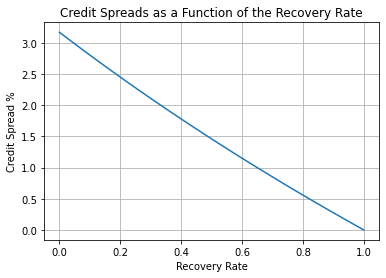

In [24]:
plt.plot(c,credit_spreads)
plt.title('Credit Spreads as a Function of the Recovery Rate')
plt.ylabel('Credit Spread %')
plt.xlabel('Recovery Rate')
plt.grid()
plt.show()

<H2>Task 3:</H2>
Returning to a model where interest rates are deterministic and default only occurs at maturity when $V(T)<K$, i.e. when the firm's value at maturity is less than the face value of the outstanding debt, consider a Poisson process $N$ with intensity $\lambda$ under the risk-neutral measure. Let $(U_i)_{i\geq1}$ be a sequence of i.i.d. random variables with expectation $\nu$. Assume that the $\sigma$-fields generated by $W$, $N$ and $(U_i)_{i\geq1}$ are mutually independent under the risk-neutral measure.
Define
$$
\pi(t)=\sum_{i=1}^{N(t)}U_i
$$
and write the dynamics of $V$ as
$$
dV(t)=V(t-)((r-\lambda\nu)dt+\sigma_VdW_{\beta}(t)+\Delta\pi(t))
$$ 
Assume further that the $U_i+1$ are lognormally distributed, i.e.
$$
\ln(U_i+1)\sim\mathcal{N}(\mu,\sigma)
$$
Write a Python function which calculates the credit spread (in terms of continuously compounded yields) for this entity, taking as inputs (in this order) $V(0)$, $K$, $T$, $r$, $\sigma_V$, $\lambda$, $\mu$ and $\sigma$.  <I>(5 marks)</I>

In [25]:
import math

def CreditSpreadsWithJumps(V0,K,T,r,sgm_v,lam,mu,sgm):

    n = 0
    summation = 1
    value = 0

    ZCB = np.exp(-r*T)

    nu = np.exp(mu + 0.5*sgm**2) - 1

    while summation >= 0.5*10e-4:

        mu_i = (r - 0.5*sgm_v**2 - lam*nu)*(T) + n*mu

        var_i = T*sgm_v**2 + n*sgm**2

        d2 = (np.log(V0/K) + mu_i)/np.sqrt(var_i)
        d1 = d2 + np.sqrt(var_i)

        poisson = np.exp(-lam*T)*(((lam*T)**n)/math.factorial(n))

        summation = poisson*(V0*np.exp(mu_i + 0.5*var_i)*norm.cdf(d1) - K*norm.cdf(d2))

        value += summation

        n += 1

    equity = value*ZCB

    debt_value = V0 - equity

    default_yield = -np.log(debt_value/K)/T

    spread = default_yield - r

    return spread

In [26]:
answer = CreditSpreadsWithJumps(50000000, 40000000, 10, 0.015, 0.3, 0.9, -0.1, 0.2)
answer

0.03983780589640817